# Analysis of Online Shopping Behaviours

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

In [42]:
df_ecom = pd.read_csv("online_shoppers.csv")
df_ecom

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0.0,0.000000,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0.0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0.0,NaN,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0.0,0.000000,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12941,0.0,0.000000,0,0.0,2,0.000000,0.200000,0.200000,0.0,0.0,Nov,3.0,2,1,13,Returning_Visitor,False,False
12942,0.0,0.000000,0,0.0,59,1309.658333,0.017241,0.030879,0.0,0.0,Dec,3.0,2,3,1,Returning_Visitor,False,False
12943,14.0,484.461579,2,14.0,33,898.491579,0.004269,0.034661,0.0,0.0,Sep,1.0,8,1,3,Returning_Visitor,False,False
12944,3.0,60.833333,0,0.0,18,884.633333,0.021053,0.041140,0.0,0.0,Mar,2.0,2,3,10,Returning_Visitor,False,False


In [43]:
df_ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12946 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12835 non-null  float64
 1   Administrative_Duration  12313 non-null  float64
 2   Informational            12946 non-null  int64  
 3   Informational_Duration   12946 non-null  float64
 4   ProductRelated           12946 non-null  int64  
 5   ProductRelated_Duration  12307 non-null  float64
 6   BounceRates              12872 non-null  float64
 7   ExitRates                12946 non-null  float64
 8   PageValues               12946 non-null  float64
 9   SpecialDay               12946 non-null  float64
 10  Month                    12946 non-null  object 
 11  OperatingSystems         12422 non-null  float64
 12  Browser                  12946 non-null  int64  
 13  Region                   12946 non-null  int64  
 14  TrafficType           

### Columns Overview
* Numerical Columns: These include visitor metrics such as `Administrative`, `ProductRelated` and `BounceRates`.
* Categorical Columns: `Month`, `VisitorType` and `Weekend` (which is a boolean).
* Target Variable: `Revenue` (boolean), indicating whether a visitor generated revenue.

In [44]:
# Summary statistics
df_ecom.describe(percentiles=[0.01, 0.05, 0.1, 0.25,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Administrative,12835.0,2.303857,3.314427,0.0,0.000000,0.000000,0.00000,0.000000,1.000000,4.000000,7.000000,9.000000,14.000000,27.000000
Administrative_Duration,12313.0,80.370267,175.494016,0.0,0.000000,0.000000,0.00000,0.000000,7.000000,92.933333,224.000000,347.142451,825.000000,3398.750000
Informational,12946.0,0.498841,1.263276,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,3.000000,6.000000,24.000000
Informational_Duration,12946.0,34.136048,140.022848,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,70.550000,194.400000,714.950000,2549.375000
ProductRelated,12946.0,31.657655,44.202635,0.0,1.000000,1.000000,3.00000,7.000000,18.000000,38.000000,74.000000,109.000000,219.550000,705.000000
ProductRelated_Duration,12307.0,1192.740077,1910.216261,0.0,0.000000,0.000000,35.00000,182.083333,599.583333,1470.522917,2875.946212,4263.674414,8698.541641,63973.522230
BounceRates,12872.0,0.022309,0.048681,0.0,0.000000,0.000000,0.00000,0.000000,0.003112,0.016933,0.059242,0.200000,0.200000,0.200000
ExitRates,12946.0,0.043266,0.048808,0.0,0.001238,0.004614,0.00749,0.014286,0.025329,0.050000,0.100000,0.200000,0.200000,0.200000
PageValues,12946.0,5.875963,18.414670,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,19.068705,38.200785,83.952209,361.763742
SpecialDay,12946.0,0.061270,0.198667,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.200000,0.600000,1.000000,1.000000


**Notes:**<br>
Column `ProductRelated_Duration` has greater observations than its 99th quartile, with maximum values reaching more than 63,000 seconds (or 17.5 hours). Therefore, we will eliminate these observations that are related to the event a user "forgot" to close a page.

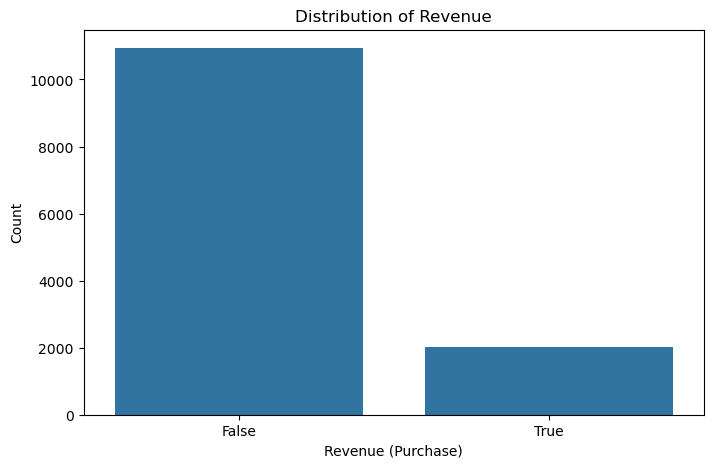

In [45]:
# Distribution of target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Revenue', data=df_ecom)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue (Purchase)')
plt.ylabel('Count')
plt.show()

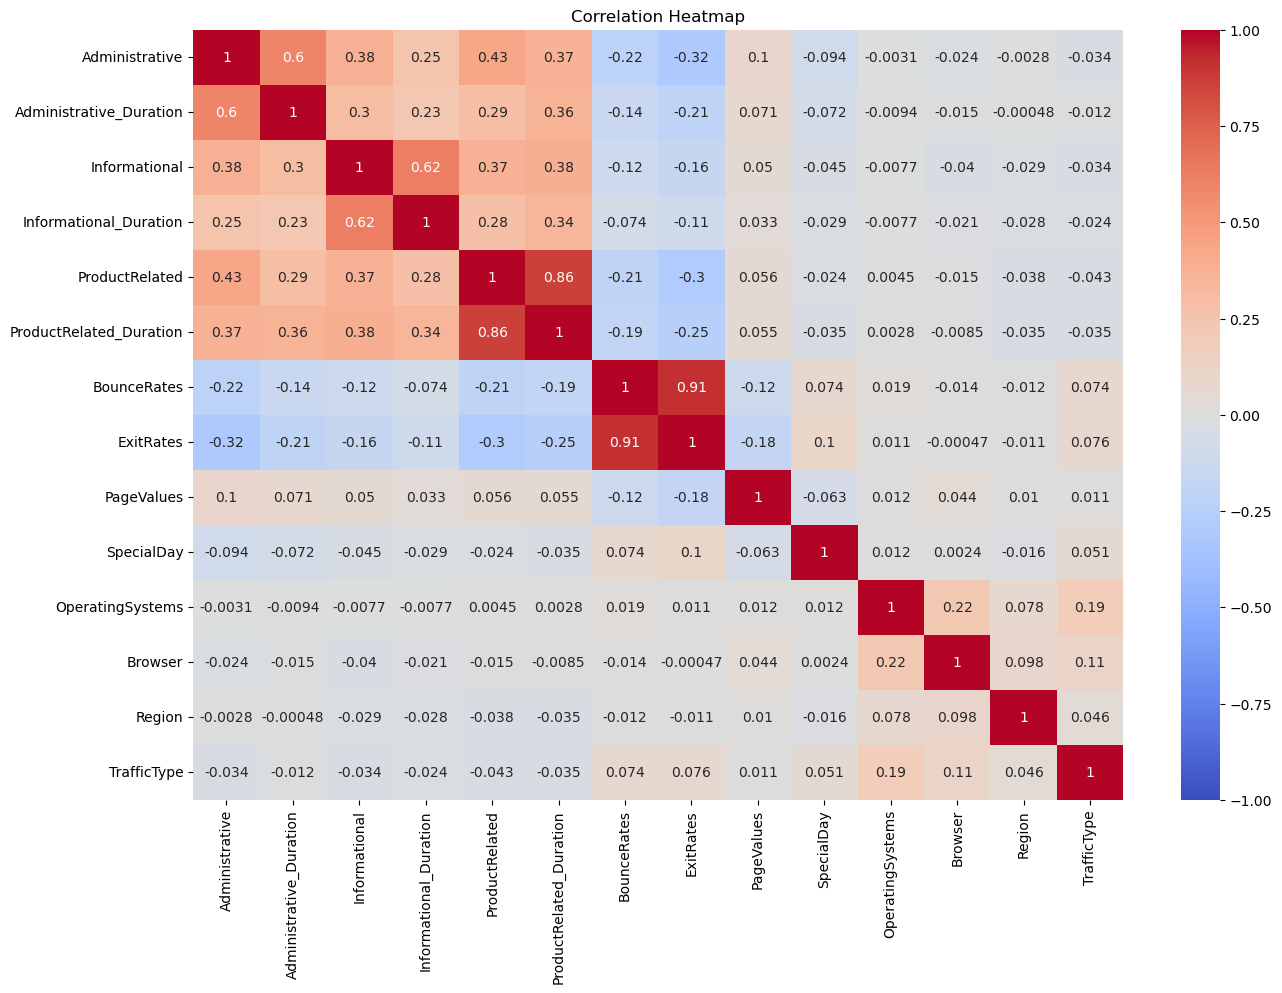

In [46]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
numeric_cols = df_ecom.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df_ecom[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

#### Key Observations
**1. Strong Positive Correlations:**
* `ProductRelated` and `ProductRelated_Duration` have a Correlation Coefficient of 0.85<br>
Interpretation: There is a _strong positive correlation_ between the amount of time spent on product-related activities and the number of product-related views. This indicates that visitors who spend more time interacting with products are likely to view more products.

* `BounceRates` and `ExitRates` have a Correlation Coefficient of 0.91<br>
Interpretation: There is a _very high correlation_ between bounce rates and exit rates. This suggests that visitors who leave a page without interaction are likely to leave the site entirely.

**2. Negative Correlations:**
* `BounceRates` and `PageValues` have a Correlation Coefficient of -0.20<br>
Interpretation: Higher bounce rates are associated with lower page values. This indicates that visitors who bounce are less likely to generate higher values from the pages they visit, suggesting that improving page engagement could enhance revenue.

* `ExitRates` and `PageValues` have a Correlation Coefficient of -0.20<br>
Interpretation: This follows a similar trend as bounce rates, emphasizing the importance of retaining visitors to increase page value.

# Data Preprocessing

In [47]:
# Handling duplicate rows
duplicate_count = df_ecom.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 711


In [48]:
df_ecom = df_ecom.drop_duplicates()

In [49]:
# Handling missing values
X = df_ecom.drop(columns='Revenue', axis=1)
y = df_ecom['Revenue'].apply(lambda x: 1 if x == True else 0)

### Split data into training and test sets

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_auc_score

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [52]:
# Identify columns with missing values in X_train
miscol_temp = pd.DataFrame(columns=['Columns','Num_train'])
miscol_temp_test = pd.DataFrame(columns=['Columns','Num_test'])

for col in X_train.columns:
    col_misval = X_train[col].isna().sum()
    if col_misval > 0:
        miscol_temp.loc[len(miscol_temp)] = [col, col_misval]
        
for col in X_test.columns:
    col_misval = X_test[col].isna().sum()
    if col_misval > 0:
        miscol_temp_test.loc[len(miscol_temp_test)] = [col, col_misval]

In [53]:
# Merge the two datasets
merged_misval_df = pd.merge(miscol_temp, miscol_temp_test, on='Columns', how='inner').sort_values(by=['Num_train'], ascending=False)
print("Columns with missing values:")
print(merged_misval_df)

Columns with missing values:
                   Columns  Num_train  Num_test
2  ProductRelated_Duration        490       112
1  Administrative_Duration        479       115
4         OperatingSystems        412        95
0           Administrative         82        24
3              BounceRates         54        15


In [54]:
# Handling missing values for specific columns
for col in ['Administrative', 'Administrative_Duration', 'ProductRelated_Duration']:
    X_train[col] = X_train[col].fillna(0)
    X_test[col] = X_test[col].fillna(0)

X_train['BounceRates'] = X_train['BounceRates'].fillna(X_train['BounceRates'].mean())
X_test['BounceRates'] = X_test['BounceRates'].fillna(X_test['BounceRates'].mean())

X_train['OperatingSystems'] = X_train['OperatingSystems'].fillna(X_train['OperatingSystems'].mode().loc[0])
X_test['OperatingSystems'] = X_test['OperatingSystems'].fillna(X_test['OperatingSystems'].mode().loc[0])

### One-hot encode for categorical features

In [55]:
col_encode = ['Month', 'VisitorType', 'Weekend']

X_train_to_encode = X_train[col_encode]
X_train_rest = X_train.drop(columns=col_encode)

X_test_to_encode = X_test[col_encode]
X_test_rest = X_test.drop(columns=col_encode)

encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoder.fit(X_train_to_encode)

X_train_encoded = encoder.transform(X_train_to_encode).toarray()
X_test_encoded = encoder.transform(X_test_to_encode).toarray()

encoded_columns = encoder.get_feature_names_out(col_encode)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)

X_train_final = pd.concat([X_train_rest, X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test_rest, X_test_encoded_df], axis=1)

### Standardize features

In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_final)
X_test = scaler.transform(X_test_final)

# Train a logistic regression model

In [57]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions with logistic regression
y_pred_logistic = logistic_model.predict(X_test)

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2065
           1       0.73      0.35      0.48       382

    accuracy                           0.88      2447
   macro avg       0.81      0.66      0.70      2447
weighted avg       0.87      0.88      0.86      2447

Logistic Regression - Confusion Matrix:


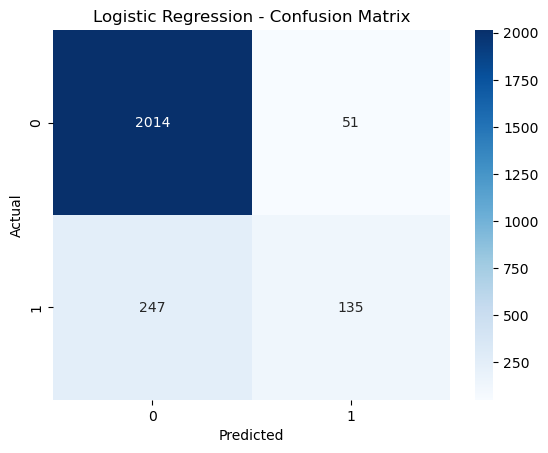

In [58]:
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_logistic))

print("Logistic Regression - Confusion Matrix:")
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

Shows that there are 2,014 True Negatives (correct predictions for "no-purchase") and 135 True Positives (correct predictions for "purchase").
There are 51 False Positives (predicted "purchase" incorrectly) and 247 False Negatives (missed "purchase" predictions).

In [59]:
# Plot Precision-Recall Curve for logistic regression
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_logistic)

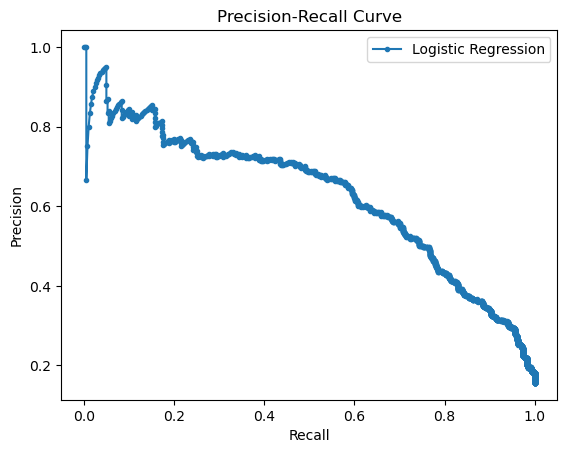

In [60]:
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

#### Precision-Recall Curve
Illustrates the trade-off between _Precision_ (the percentage of positive predictions that are correct) and _Recall_ (the percentage of true positives that are correctly identified) for different thresholds of the Logistic Regression model.

#### Key Insights
- As Recall increases, Precision tends to decrease. This is expected since increasing Recall often involves including more false positives.
- The initial high value of precision around Recall 0.0 indicates that the model makes highly accurate predictions at low recall levels (but captures fewer true positive cases).
- The curve gradually declines, indicating that as we capture more true positives, our confidence in predictions tends to decrease.

# Train a decision tree model

In [61]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions with decision tree
y_pred_tree = decision_tree_model.predict(X_test)

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2065
           1       0.54      0.56      0.55       382

    accuracy                           0.86      2447
   macro avg       0.73      0.74      0.73      2447
weighted avg       0.86      0.86      0.86      2447

Decision Tree - Confusion Matrix:


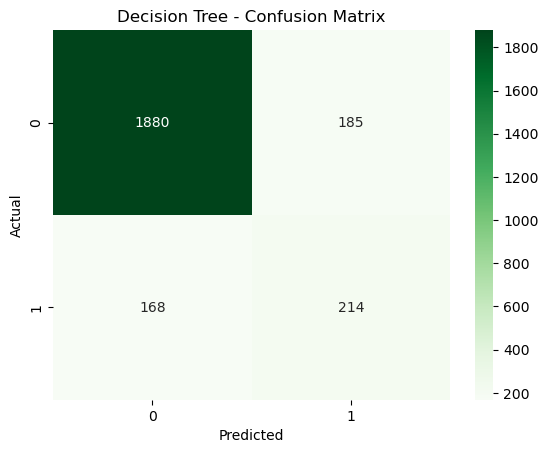

In [62]:
print("Decision Tree - Classification Report:")
print(classification_report(y_test, y_pred_tree))

print("Decision Tree - Confusion Matrix:")
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

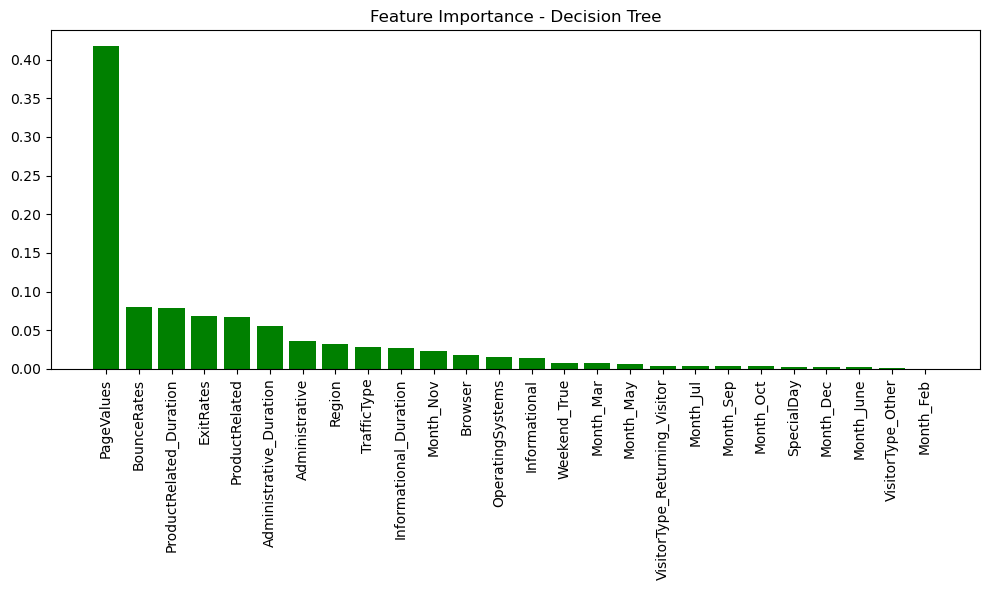

In [63]:
# Feature Importance for Decision Tree
importances_tree = decision_tree_model.feature_importances_
features = X_train_final.columns
indices_tree = np.argsort(importances_tree)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Decision Tree")
plt.bar(range(X_train_final.shape[1]), importances_tree[indices_tree], align="center", color="green")
plt.xticks(range(X_train_final.shape[1]), [features[i] for i in indices_tree], rotation=90)
plt.tight_layout()
plt.show()

#### Key Insights
- `PageValues`: This feature is by far the most important, contributing around 40% to the prediction. This means that the value assigned to specific pages is a significant predictor of whether a user will make a purchase.
- `BounceRates`, `ProductRelated_Duration`, `ExitRates`: These features are also relatively important. High BounceRates or high ExitRates are often correlated with a lack of purchase intent.
- Features like `Administrative`, `Informational_Duration` and `TrafficType` have much lower importance, implying they contribute less to the decision-making process of the model.

# Train a random forest model

In [64]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2065
           1       0.77      0.53      0.63       382

    accuracy                           0.90      2447
   macro avg       0.84      0.75      0.79      2447
weighted avg       0.89      0.90      0.89      2447

Random Forest - Confusion Matrix:


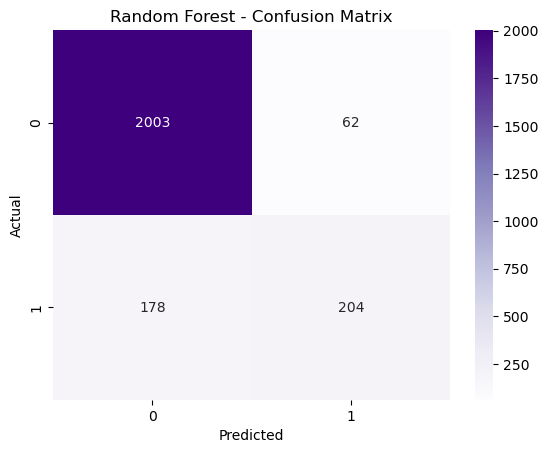

In [65]:
# Evaluate the random forest model
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest - Confusion Matrix:")
cm_forest = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_forest, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()

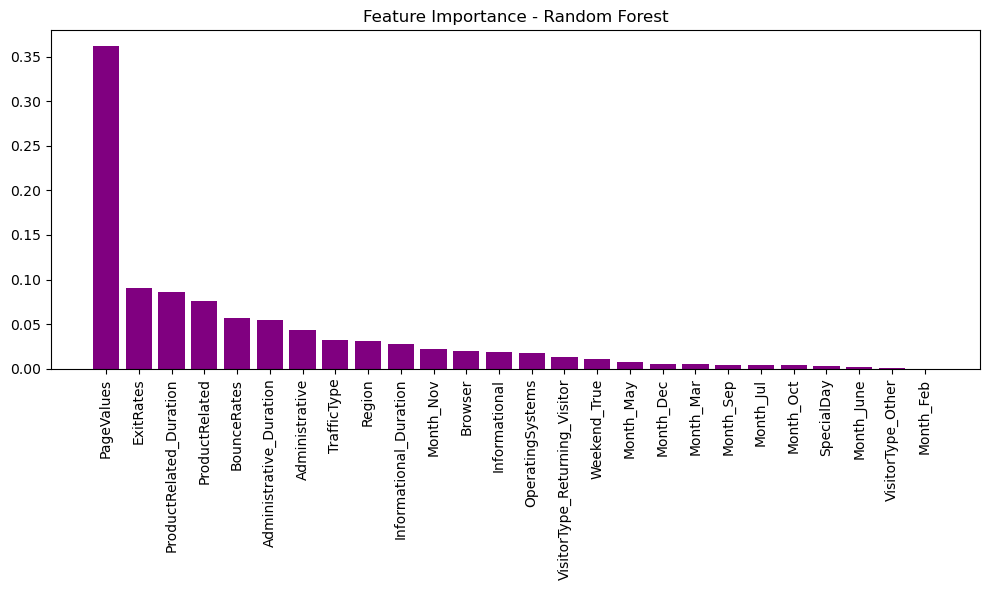

In [66]:
# Feature Importance for Random Forest
importances_forest = rf_model.feature_importances_
indices_forest = np.argsort(importances_forest)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X_train_final.shape[1]), importances_forest[indices_forest], align="center", color="purple")
plt.xticks(range(X_train_final.shape[1]), [features[i] for i in indices_forest], rotation=90)
plt.tight_layout()
plt.show()

#### Key Insights
- `PageValues` is still the most crucial predictor in this model as well.
- `ExitRates`, `ProductRelated_Duration`, and `BounceRates` are also important but with slightly different rankings compared to the Decision Tree.
- Overall, the relative importance of features is similar between Decision Tree and Random Forest, which indicates consistency across models.

# Hypertuning Logistic Regression, K-Nearest Neighbor, Random Forest

In [67]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

For each model, I included appropriate hyperparameters in the List_param for a better comparison of their effectiveness after fine-tuning.

In [68]:
List_param = [
    {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'newton-cg', 'saga'],
        'class_weight': [None, 'balanced'],
        'max_iter': [1000, 2000]  # Added max_iter parameter
    },
    {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
]

In [69]:
ml_model_hyp = {
    'Logistic Regression': LogisticRegression(random_state=2),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=2)
}

In [70]:
hyper_performance = pd.DataFrame(columns=['Model', 'Parameter Search Runtime', 'Model Runtime', 'Recall Train', 'Recall Test'])

In [71]:
i = 0
for model_name, model_used in ml_model_hyp.items():
    base_model = model_used

    start_time_search = time.time()

    if model_name != 'Random Forest':
        param_search = GridSearchCV(base_model, List_param[i], cv=5, verbose=2)  # Added verbosity
    else:
        param_search = RandomizedSearchCV(base_model, List_param[i], cv=5, verbose=2)
        
    param_search.fit(X_train, y_train)
    best_params = param_search.best_params_
    print(f'Best parameters for {model_name}: {best_params}')  # Log best parameters
    best_model = base_model.__class__(**best_params)
    
    end_time_search = time.time()
    total_runtime_search = end_time_search - start_time_search

    start_time_fit = time.time()
    
    best_model.fit(X_train, y_train)

    # Save best model
    joblib.dump(best_model, f'{model_name}_best_model.pkl')
    
    y_pred_proba_train_hyp = best_model.predict_proba(X_train)[:, 1]
    y_pred_proba_test_hyp = best_model.predict_proba(X_test)[:, 1]
    
    end_time_fit = time.time()  
    total_runtime_fit = end_time_fit - start_time_fit

    train_AUC_hyp = roc_auc_score(y_true=y_train, y_score=y_pred_proba_train_hyp).round(4)
    test_AUC_hyp = roc_auc_score(y_true=y_test, y_score=y_pred_proba_test_hyp).round(2)
    
    print(f'{model_name} AUC train probability: ', train_AUC_hyp)
    print(f'{model_name} AUC test probability: ', test_AUC_hyp)

    recall_score_hyp_train = class_report_train(y_pred_proba_train_hyp, y_train)
    recall_score_hyp_test = class_report_train(y_pred_proba_test_hyp, y_test)
    
    temp_df_hyp = pd.DataFrame({'Model': [model_name], 'Parameter Search Runtime': [round(total_runtime_search, 2)], 'Model Runtime': [round(total_runtime_fit, 2)], 
                                'Recall Train': [round(recall_score_hyp_train, 3)], 'Recall Test': [round(recall_score_hyp_test, 2)]})
    hyper_performance = pd.concat([hyper_performance, temp_df_hyp], ignore_index=True)
    
    i += 1

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END C=0.001, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, class_weig

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    sol

[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean

In [72]:
print("\nHypertuning Performance:")
print(hyper_performance)


Hypertuning Performance:
                 Model  Parameter Search Runtime  Model Runtime  Recall Train  \
0  Logistic Regression                     35.08           0.04         0.590   
1   K-Nearest Neighbor                      5.13           0.35         1.000   
2        Random Forest                     21.36           0.38         0.991   

   Recall Test  
0         0.60  
1         0.29  
2         0.54  


## Hypertuning Performance Table
This table summarizes the performance metrics for each model after performing hyperparameter tuning.

- Parameter Search Runtime: The time taken to perform the hyperparameter search (GridSearchCV or RandomizedSearchCV).
    For example, Logistic Regression took 34.70 seconds for the parameter search.
- Model Runtime: The time taken to fit the final model with the best hyperparameters.
    Logistic Regression took 0.04 seconds to fit the model.
- Recall Train: The recall score for the training dataset after hypertuning. Recall measures how well the model can identify the positive class (Revenue=True).
    Logistic Regression had a recall score of 0.590 on the training data.
    K-Nearest Neighbor had a perfect recall of 1.0, indicating overfitting (since it’s likely memorizing the training data).
    Random Forest had a recall of 0.702, indicating it could balance between identifying true positives and avoiding overfitting.
- Recall Test: The recall score for the test dataset. This helps in understanding the model's generalization ability.
    Logistic Regression had a recall of 0.60 on the test data.
    K-Nearest Neighbor had a lower recall of 0.29, suggesting it did not generalize well.
    Random Forest had a recall of 0.54 on the test data.

Logistic Regression appears to be the most balanced model considering both training and test recall scores, indicating decent generalization.